# Initial Analysis Demo Notebook

Note : 

0. Check out the pocketAnalyzer.py. I tried my best to write doc strings and essential comments that would be useful
    to any future dev working on this piece of code. Also, most function has long names that indicates what it literally does. 

1. pocketAnalyzer.py should either be in the same working directory as this notebook or on the global PYTHONPATH.

2. This RNAligandAnalyzer class within pocketAnalyzer.py does not do any pre or post processing of given trajectory
    or model file. It is user's responsibility to center, align, stride or do whatever they want to do with traj or
    model files beforehand.
    
3. Though this analysis suite was built to analyze RNA - small molecule system. This can be used for any Target - Ligand
    system as long as model, traj files are LOOS compatible and selection strings obeys LOOS rules.

4. There's a simple plotting function to do instant visualization of data generated. This is just for the initial check.

Comments :

1. The analysis suite can be improved and optimized further :

    1. Right now, the rmsd is done based on the alignment of a AG selection to itself in reference frame or file. If the 
        selection itself is flexible, this wont serve us any good. An optional feature to add would be to add a ref selection
        argument that user has to input to which the whole structure will be aligned (and ideally, this selection would be 
        something that has low RMSF and does not overlap with the selection with which are calculating RMSD or something)
        
    2. At least for RNA system, removing hydrogen from selection may or may not improve the RMSD of whole RNA or RNA binding
        pocket.

___

1. Importing relevant modules for analysis and plotting.

In [1]:
from pocketAnalyzer import RNAligandAnalyzer
import matplotlib.pyplot as plt
# This sets up the Matplotlib interactive windows:
# %matplotlib widget


2. Input parameters

    Right now, this is hardcoded as this notebook is intended for demo purposes.
    In future, it is better to parse these inputs from outside as this analysis notebook turns to a solid python script.
    This would be useful for the big picture - which is automating this workflow.

In [2]:
# ------------------------------------------------------- #
#       Input parameters for future class structure       #
# ------------------------------------------------------- #

# For model file : ideal file would be .psf but .pdb work as well
pdbFile = "aligned_traj_s100_dry.pdb"
dcdFile = "aligned_traj_s100_dry.dcd"

# To do: What I mean by cutoff
# The cutoff distance is in A
cutoff = 8

# ------------------------------------------------------- #
#                   Selection Strings                     #
# ------------------------------------------------------- #

# Inverse of (Anything that are not RNA) is RNA :
# Why this way? It is easier to select RNA this way than
# going for G,A,U,C,U5,G3,.....etc selection concatenation.
rnaSelection = "resname != 'SML' && \
                resname != 'WAT' && \
                resname != 'K+' && \
                resname != 'Cl-' "
ligSelection = "resname == 'SML'"

# Optional ref file
refFile = "./test/Crystal.pdb"


3. A simple function to plot the numpy data array.

In [3]:

def simplePlot(numpyArray, labelX, labelY, figTitle, filename, yRange=()):
       fig, ax = plt.subplots()
       x, y = numpyArray[:, 0], numpyArray[:, 1]

       ax.plot(x, y)

       ax.set(xlabel=str(labelX), ylabel=str(labelY),
              title=figTitle)
       
       if yRange:
        plt.ylim(yRange)

       fig.savefig(str(filename) + ".png")
       plt.show()

___

#### Analysis - 1

##### RNA - Ligand Analysis using the whole trajectory provided 

1. Pocket defined by residues that interact with ligand within given cutoff for at least 70% of the trajectory.
2. RMSD is calculated with the initial frame. 

In [4]:
# Creating RNAligandAnalyzer object
system = RNAligandAnalyzer(pdbFile, dcdFile, cutoff, rnaSelection, ligSelection)

In [5]:
# Running Contact Probability Calculation on the object we created
contactsNormalized, bindingResDict = system.contactsInfo()

In [6]:
# Defining Pocket based on traj prevalence of 70 %
pocket = system.definePocketByTrajPrevalence(minFractionOfTraj=0.70)

The binding pocket residues for given criteria:
resid == 5 || resid == 6 || resid == 7 || resid == 8 || resid == 9 || resid == 22 || resid == 23 || resid == 24 || resid == 25 || resid == 26 || resid == 27 || resid == 28 || resid == 29 && (resname != 'WAT')


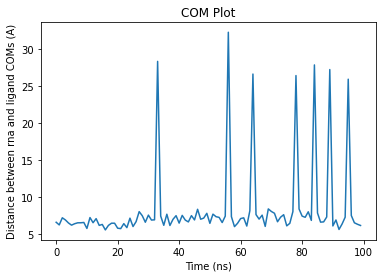

In [7]:
# Evolution of distance between  COM of RNA and ligand
rna_ligandCOM = system.comDistanceBetweenRNAAndLigand()
simplePlot(rna_ligandCOM, "Time (ns)", "Distance between rna and ligand COMs (A)", "COM Plot", "1_rna_ligandCOM")

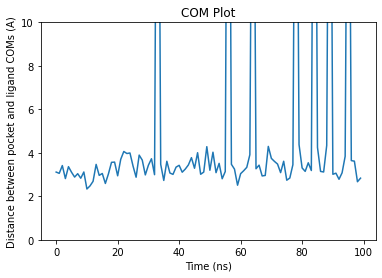

In [8]:
# Evolution of distance between  COM of pocket and ligand
pocket_ligandCOM = system.comDistanceBetweenPocketAndLigand()
simplePlot(pocket_ligandCOM, "Time (ns)", "Distance between pocket and ligand COMs (A)", "COM Plot", "1_pocket_ligandCOM", yRange=(0,10))

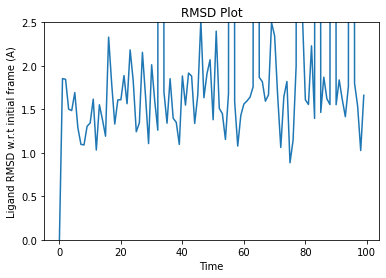

In [9]:
# Evolution of RMSD of ligand w.r.t initial frame
rmsdEvoultionLigand_WrtZerothFrame = system.rmsdBtwLigandAndTrajFrame()
simplePlot(rmsdEvoultionLigand_WrtZerothFrame, "Time", "Ligand RMSD w.r.t initial frame (A)", "RMSD Plot", "1_rmsdEvolutionLigand_WrtZerothFrame", yRange=(0, 2.5))

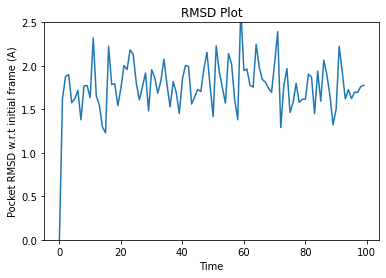

In [10]:
# Evolution of RMSD of pocket w.r.t initial frame
rmsdEvolutionPocket_WrtZerothFrame = system.rmsdBtwPocketAndTrajFrame()
simplePlot(rmsdEvolutionPocket_WrtZerothFrame, "Time", "Pocket RMSD w.r.t initial frame (A)", "RMSD Plot", "1_rmsdEvolutionPocket_WrtZerothFrame", yRange=(0,2.5))

___

#### Analysis - 2

##### RNA - Ligand Analysis using the initial frame of traj 

1. Pocket defined by residues that interact with ligand within given cutoff for the first frame of the trajectory.
2. RMSD is calculated with the initial frame. 

In [11]:
# Creating RNAligandAnalyzer object
system = RNAligandAnalyzer(pdbFile, dcdFile, cutoff, rnaSelection, ligSelection)

In [12]:
# Running Contact Probability Calculation on the object we created
contactsNormalized, bindingResDict = system.contactsInfo(fullTraj=False)

In [13]:
# Defining Pocket based on traj prevalence of 75 % - The default value is
# absurd in this case as there is only one frame we are considering, so
# it is either 0 or 1. In this particular case, defineByAllInteracting...
# should give the same answer.

pocket = system.definePocketByTrajPrevalence()

The binding pocket residues for given criteria:
resid == 5 || resid == 6 || resid == 7 || resid == 8 || resid == 9 || resid == 22 || resid == 23 || resid == 24 || resid == 25 || resid == 26 || resid == 27 || resid == 28 || resid == 29 && (resname != 'WAT')


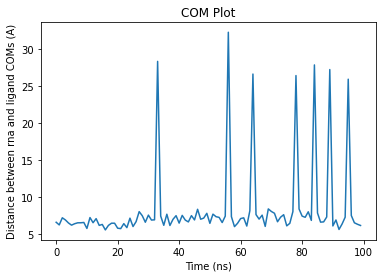

In [14]:
# Evolution of distance between  COM of RNA and ligand
rna_ligandCOM = system.comDistanceBetweenRNAAndLigand()
simplePlot(rna_ligandCOM, "Time (ns)", "Distance between rna and ligand COMs (A)", "COM Plot", "2_rna_ligandCOM")

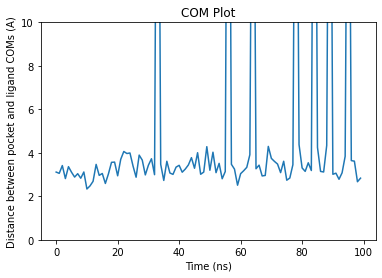

In [15]:
# Evolution of distance between  COM of pocket and ligand
pocket_ligandCOM = system.comDistanceBetweenPocketAndLigand()
simplePlot(pocket_ligandCOM, "Time (ns)", "Distance between pocket and ligand COMs (A)", "COM Plot", "2_pocket_ligandCOM", yRange=(0, 10))

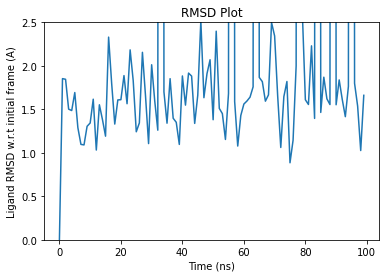

In [16]:
# Evolution of RMSD of ligand w.r.t initial frame
rmsdEvoultionLigand_WrtZerothFrame = system.rmsdBtwLigandAndTrajFrame()
simplePlot(rmsdEvoultionLigand_WrtZerothFrame, "Time (ns)", "Ligand RMSD w.r.t initial frame (A)", "RMSD Plot", "2_rmsdEvolutionLigand_WrtZerothFrame", yRange=(0, 2.5))

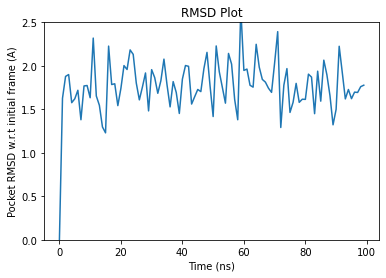

In [17]:
# Evolution of RMSD of pocket w.r.t initial frame
rmsdEvolutionPocket_WrtZerothFrame = system.rmsdBtwPocketAndTrajFrame()
simplePlot(rmsdEvolutionPocket_WrtZerothFrame, "Time (ns)", "Pocket RMSD w.r.t initial frame (A)", "RMSD Plot", "2_rmsdEvolutionPocket_WrtZerothFrame", yRange=(0, 2.5))

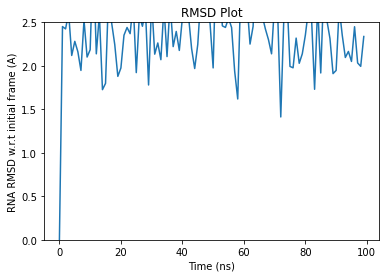

In [18]:
# Evolution of RMSD of whole RNA w.r.t initial frame
rmsdEvolutionPocket_WrtZerothFrame = system.rmsdBtwRNAandTrajFrame()
simplePlot(rmsdEvolutionPocket_WrtZerothFrame, "Time (ns)", "RNA RMSD w.r.t initial frame (A)", "RMSD Plot", "2_rmsdEvolutionRNA_WrtZerothFrame", yRange=(0, 2.5))